# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roullete/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            ray_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roullete/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roullete/config/biased_fitness

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

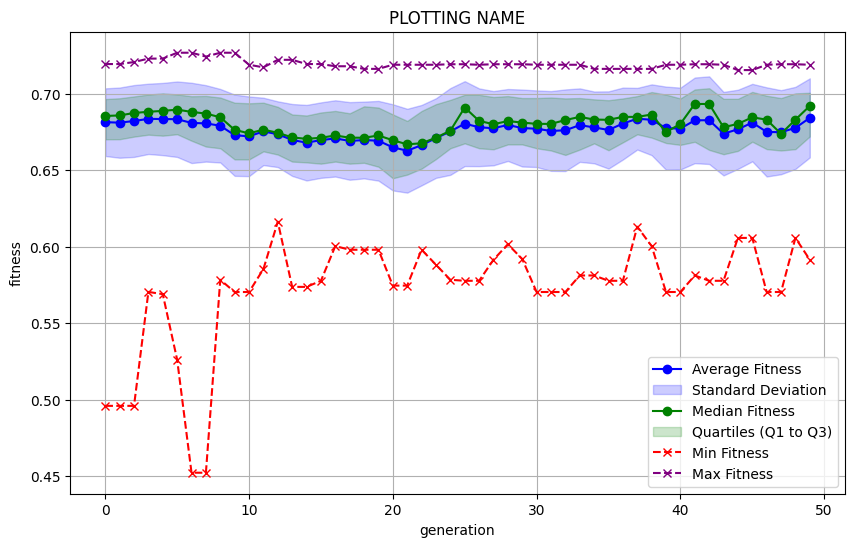

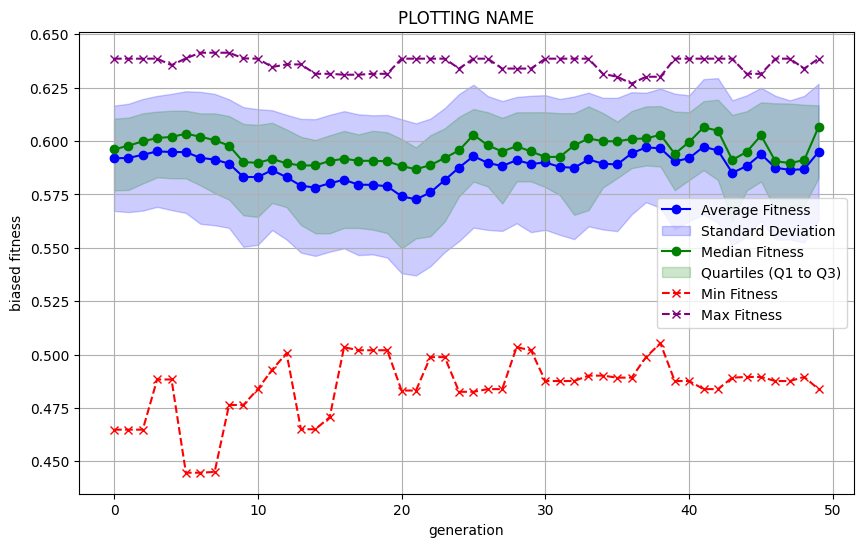

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_77', 'GridStrictTransformation_77']
predict: (0.2891455869669377, 373.06509879999993, 458.58695479999994)
biased_fitness: 0.6194623788628724, fitness: 0.7002838623306235
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 1.4319261182082728, dy: 9.306796670101225, ]


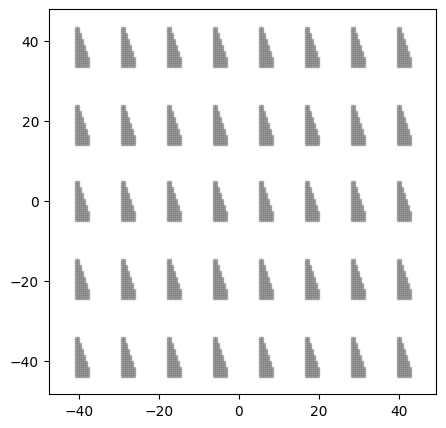

--------------------------------------------------
label: VentHole Chromosome_40: ['RayShape_156', 'GridStrictTransformation_281']
predict: (0.2959357204183979, 373.8066031000001, 454.26079059999995)
biased_fitness: 0.5293453174424292, fitness: 0.6503058273160209
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 1.4319261182082728, dy: 9.306796670101225, ]


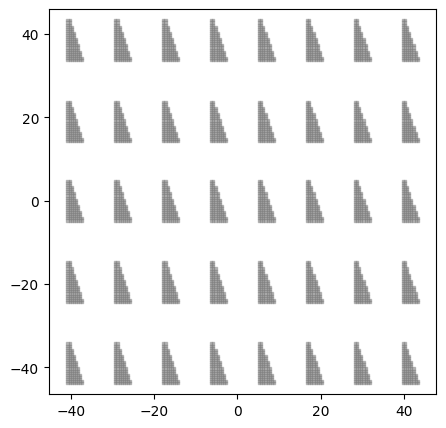

--------------------------------------------------
label: VentHole Chromosome_77: ['RayShape_281', 'GridStrictTransformation_3']
predict: (0.29254215508260106, 372.7279673999999, 457.3204804000003)
biased_fitness: 0.5761290310435849, fitness: 0.6743362101739884
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 1.4319261182082728, dy: 9.306796670101225, ]


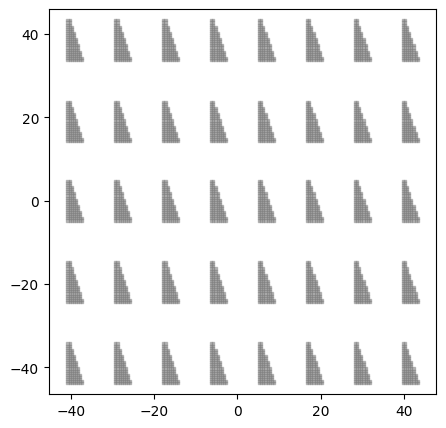

--------------------------------------------------
label: VentHole Chromosome_91: ['RayShape_77', 'CircularStrictTransformation_84']
predict: (0.2900580837423701, 373.04187470000005, 456.96954200000005)
biased_fitness: 0.6100383701068184, fitness: 0.6993620790762987
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


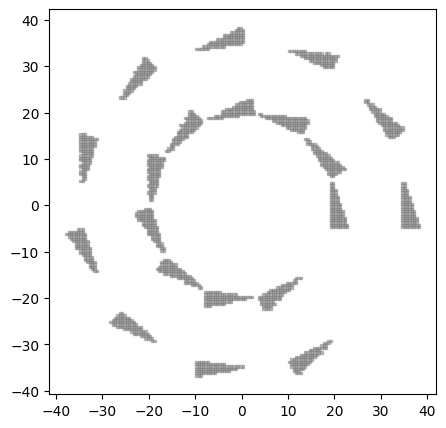

--------------------------------------------------
label: VentHole Chromosome_127: ['RayShape_91', 'CornerTransformation_281']
predict: (0.29154063266570085, 374.73771610000006, 459.6274800999999)
biased_fitness: 0.5754876019801879, fitness: 0.6627676923429916
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.6626059619288358, rot_count: 6.0, ]


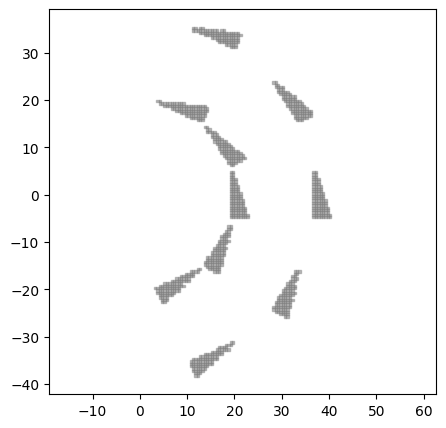

--------------------------------------------------
label: VentHole Chromosome_91: ['RayShape_104', 'CornerTransformation_84']
predict: (0.2910814562417432, 373.5049244, 462.0414521999999)
biased_fitness: 0.5832520862155953, fitness: 0.6614535545825684
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


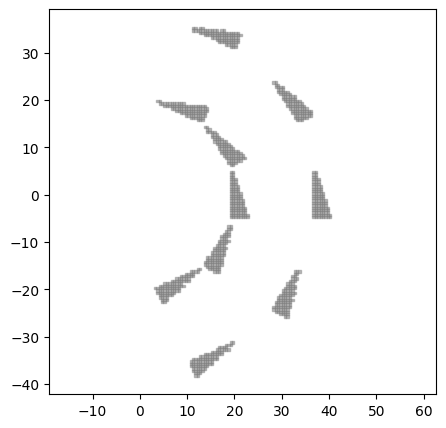

--------------------------------------------------
label: VentHole Chromosome_127: ['RayShape_281', 'CircularStrictTransformation_91']
predict: (0.2905899674793977, 373.45043499999997, 459.33352890000015)
biased_fitness: 0.5958212224884321, fitness: 0.6801805057060224
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


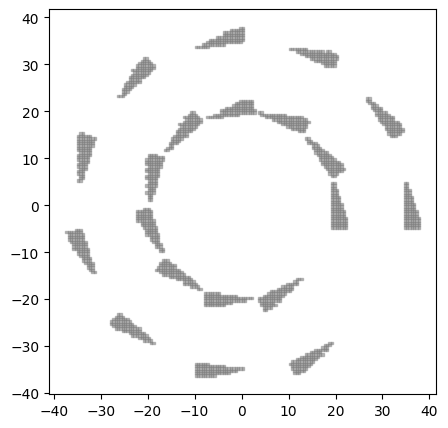

--------------------------------------------------
label: VentHole Chromosome_281: ['RayShape_127', 'CornerTransformation_104']
predict: (0.2907322130313128, 373.4380001000001, 457.5049882999998)
biased_fitness: 0.5975490404616204, fitness: 0.6879629276868722
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.6626059619288358, rot_count: 6.0, ]


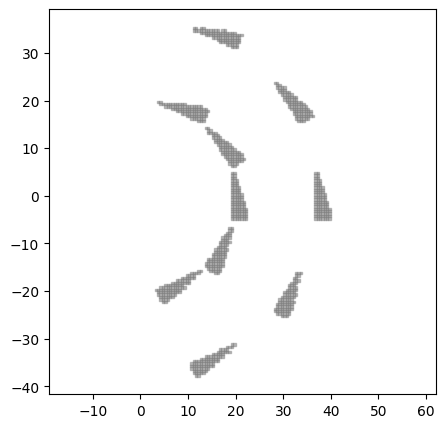

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_84', 'CornerTransformation_281']
predict: (0.289954796296489, 373.1660690999999, 459.11703309999984)
biased_fitness: 0.6065684401491545, fitness: 0.689036526035111
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.6626059619288358, rot_count: 6.0, ]


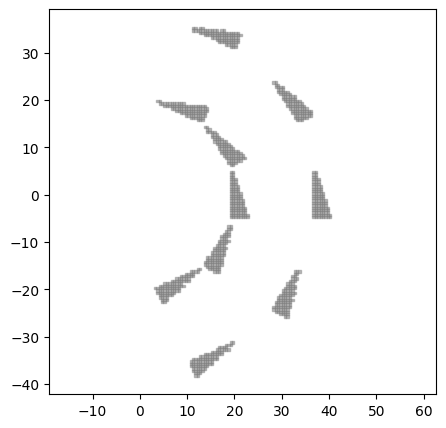

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_3', 'CircularStrictTransformation_127']
predict: (0.28997560945178646, 373.1850915, 456.2455921)
biased_fitness: 0.6119248259749894, fitness: 0.7030904874821352
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


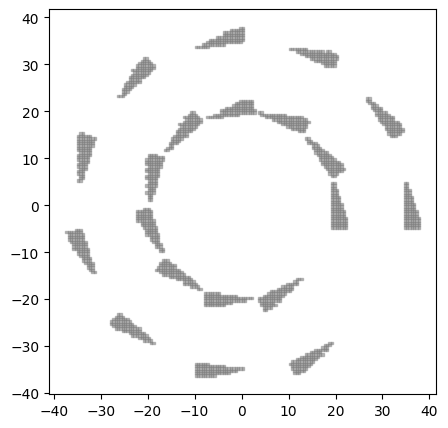

--------------------------------------------------
label: VentHole Chromosome_335: ['RayShape_77', 'CornerTransformation_56']
predict: (0.29028939067591564, 373.7538569000001, 462.5947599999998)
biased_fitness: 0.591989726037181, fitness: 0.6653630087408443
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


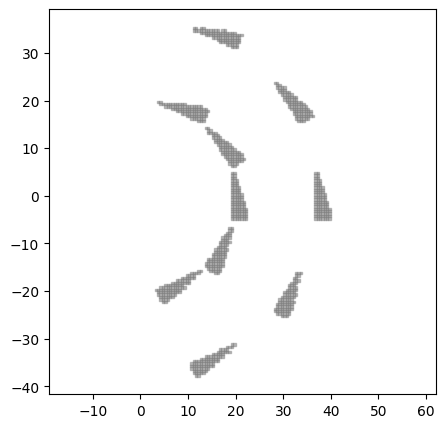

--------------------------------------------------
label: VentHole Chromosome_77: ['RayShape_3', 'CornerTransformation_335']
predict: (0.2897575350607333, 373.5469837, 458.2661075)
biased_fitness: 0.6091273756497335, fitness: 0.6933591933926668
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


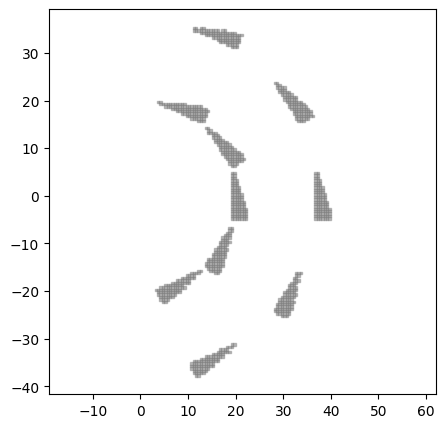

--------------------------------------------------
label: VentHole Chromosome_335: ['RayShape_77', 'CircularStrictTransformation_127']
predict: (0.29433338155407207, 374.1838455999998, 458.74855059999993)
biased_fitness: 0.5409163290429919, fitness: 0.6420042034592804
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


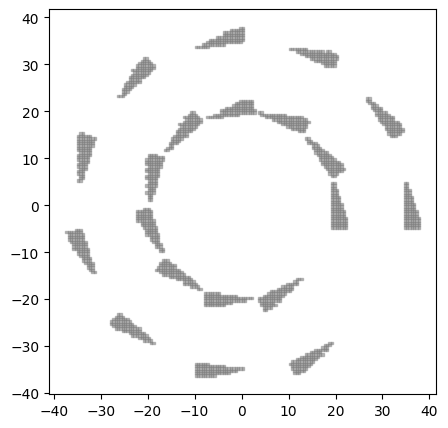

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_347', 'GridStrictTransformation_127']
predict: (0.28923685481805084, 372.5442649999997, 457.5694397000001)
biased_fitness: 0.6228238281472894, fitness: 0.7070629283194926
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 7.140913745046637, dy: 9.306796670101225, ]


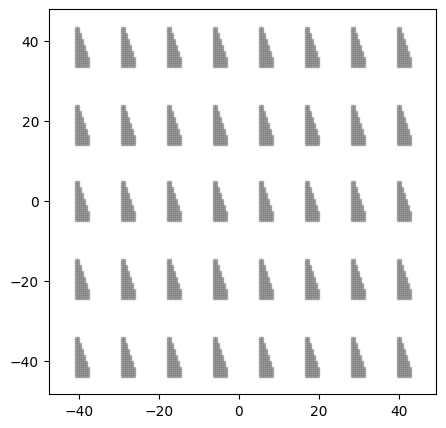

--------------------------------------------------
label: VentHole Chromosome_335: ['RayShape_84', 'CornerTransformation_127']
predict: (0.2896864246203419, 373.4644542, 457.1406227)
biased_fitness: 0.6127865389152135, fitness: 0.7001103692965811
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.4552331665792279, rot_count: 6.0, ]


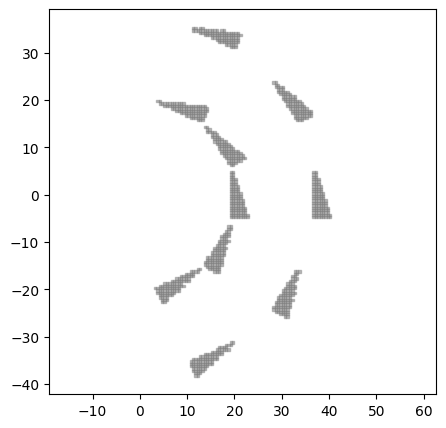

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_281', 'CircularStrictTransformation_127']
predict: (0.29312268409838915, 373.4744589999999, 460.3053389)
biased_fitness: 0.5582994498225522, fitness: 0.6498741695161089
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.0570638349267942, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


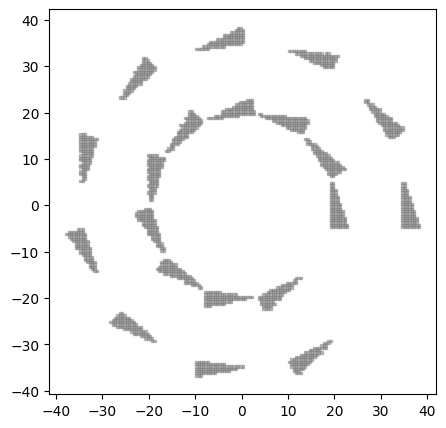

--------------------------------------------------
label: VentHole Chromosome_119: ['RayShape_3', 'CornerTransformation_347']
predict: (0.2894953894783243, 373.5789770000002, 458.15951989999985)
biased_fitness: 0.6128506225034588, fitness: 0.6963536207167565
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.0570638349267942, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.6626059619288358, rot_count: 6.0, ]


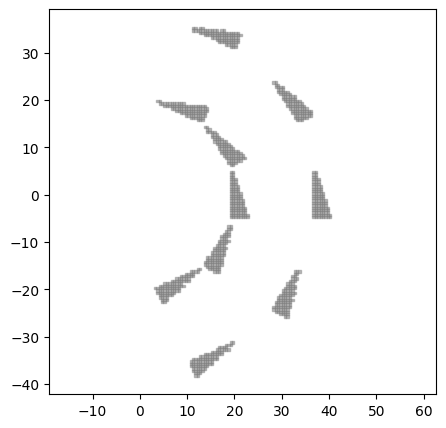

--------------------------------------------------
label: VentHole Chromosome_56: ['RayShape_119', 'GridStrictTransformation_84']
predict: (0.2981399218084868, 373.79200409999993, 461.6332892999999)
biased_fitness: 0.4838144955811851, fitness: 0.5914743149151327
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.0570638349267942, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 7.140913745046637, dy: 9.306796670101225, ]


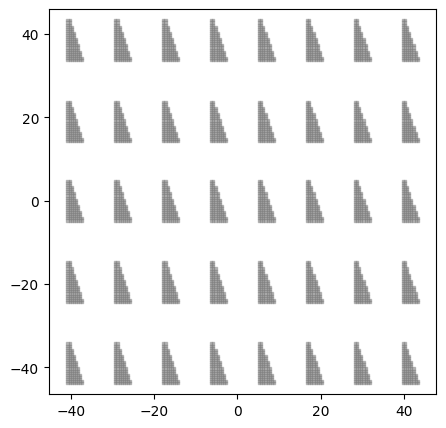

--------------------------------------------------
label: VentHole Chromosome_40: ['RayShape_347', 'GridStrictTransformation_56']
predict: (0.28803834395170624, 372.88172979999996, 457.24055469999985)
biased_fitness: 0.6385734262761129, fitness: 0.7190051379829384
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 7.140913745046637, dy: 9.306796670101225, ]


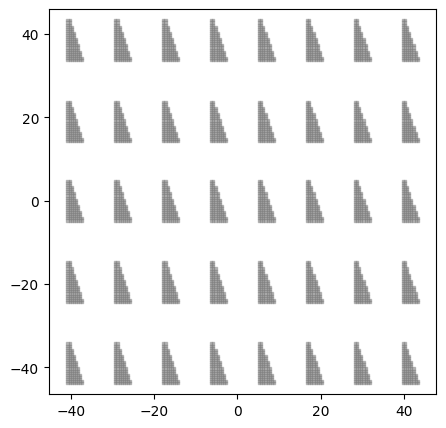

--------------------------------------------------
label: VentHole Chromosome_156: ['RayShape_3', 'CornerTransformation_119']
predict: (0.2901591083046269, 373.51490179999996, 463.54744709999983)
biased_fitness: 0.5931030805352241, fitness: 0.6630971724537322
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.6626059619288358, rot_count: 6.0, ]


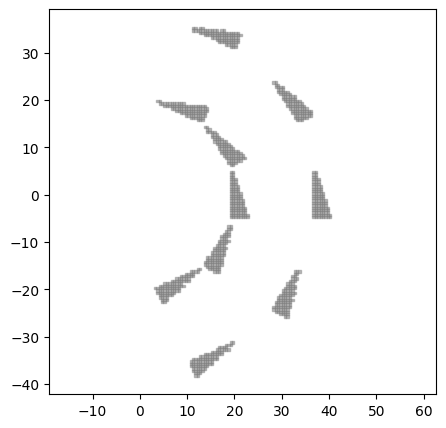

--------------------------------------------------
label: VentHole Chromosome_281: ['RayShape_84', 'CornerTransformation_405']
predict: (0.2909532416777072, 373.4768343000001, 460.38535139999976)
biased_fitness: 0.588499742212099, fitness: 0.6711566547229285
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.4552331665792279, rot_count: 6.0, ]


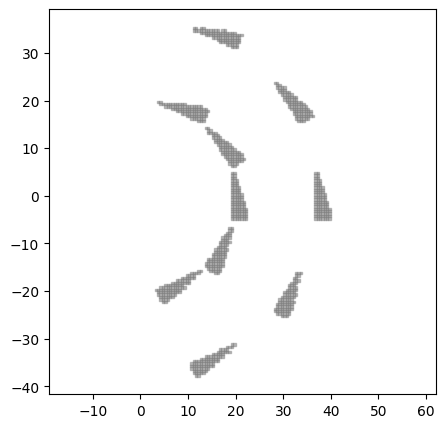

--------------------------------------------------
label: VentHole Chromosome_127: ['RayShape_56', 'GridStrictTransformation_40']
predict: (0.2899018370696327, 373.2748592, 455.37591960000003)
biased_fitness: 0.6142481458251423, fitness: 0.707727735303673
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 7.140913745046637, dy: 9.306796670101225, ]


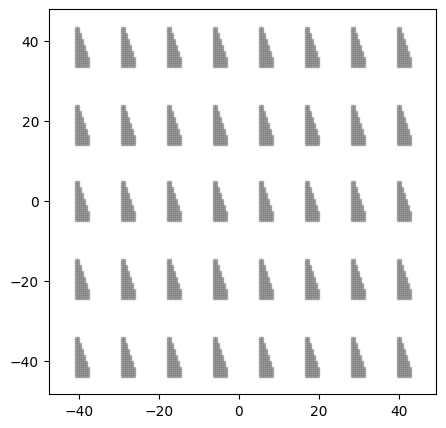

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_3', 'CircularStrictTransformation_40']
predict: (0.29056947915147235, 373.52851710000004, 459.39454720000015)
biased_fitness: 0.5955956119793864, fitness: 0.6796898869852754
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


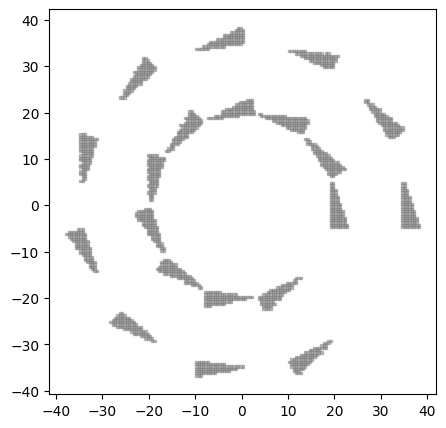

--------------------------------------------------
label: VentHole Chromosome_40: ['RayShape_104', 'CornerTransformation_91']
predict: (0.2900294854790444, 373.4018346999999, 457.10068319999976)
biased_fitness: 0.6083766633933795, fitness: 0.6971925557095577
shape parameter:
parameter_list: [ upper_slope: 1.6411643541179155, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


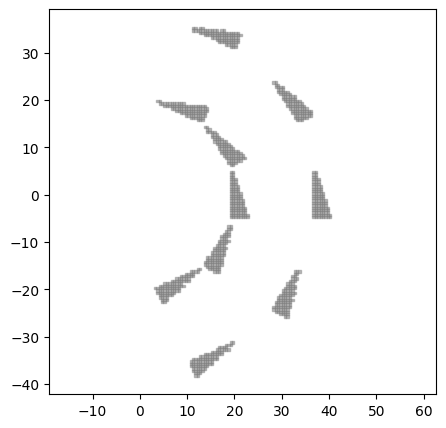

--------------------------------------------------
label: VentHole Chromosome_84: ['RayShape_3', 'CornerTransformation_84']
predict: (0.2900514247448971, 373.39275319999996, 459.82005459999965)
biased_fitness: 0.6026761783714415, fitness: 0.6834217135510309
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


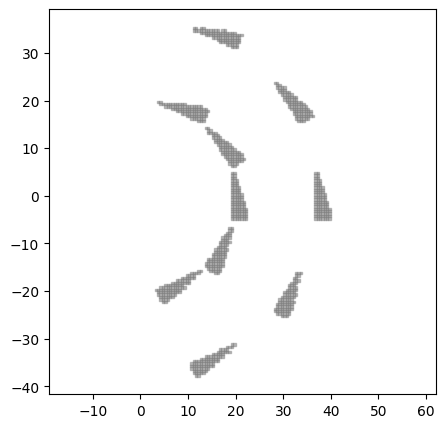

--------------------------------------------------
label: VentHole Chromosome_67: ['RayShape_56', 'CornerTransformation_104']
predict: (0.28932677619621017, 373.0784447000002, 457.3216324999999)
biased_fitness: 0.6193896447530567, fitness: 0.7047318520378977
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.0570638349267942, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


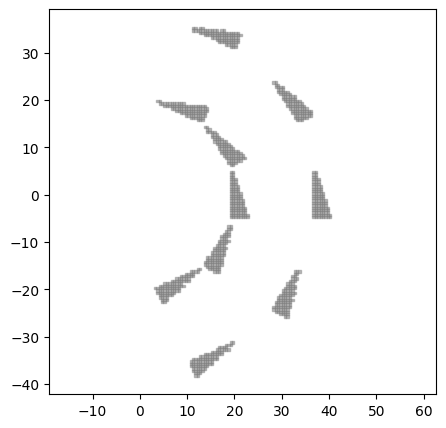

--------------------------------------------------
label: VentHole Chromosome_127: ['RayShape_77', 'GridStrictTransformation_3']
predict: (0.2896396892575792, 372.3788689999999, 456.13129480000003)
biased_fitness: 0.6208874157938913, fitness: 0.7110522884242081
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 1.4319261182082728, dy: 9.306796670101225, ]


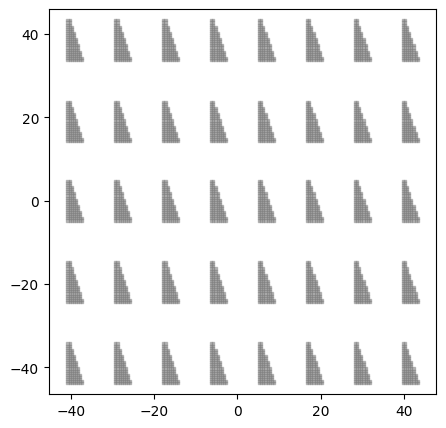

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_127', 'CornerTransformation_60']
predict: (0.29028275703801976, 373.75469189999995, 460.86381409999973)
biased_fitness: 0.5955403137677241, fitness: 0.674079899619804
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.4552331665792279, rot_count: 6.0, ]


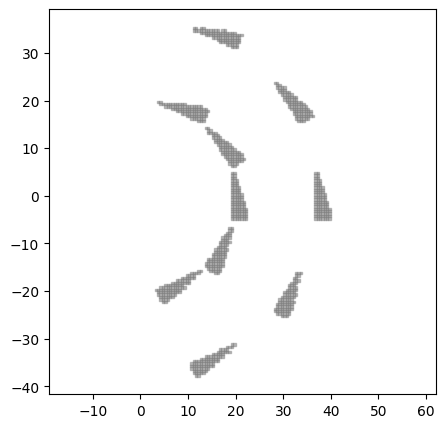

--------------------------------------------------
label: VentHole Chromosome_281: ['RayShape_281', 'CircularStrictTransformation_3']
predict: (0.2933310134743694, 373.94684899999993, 458.5274296)
biased_fitness: 0.5565767071588286, fitness: 0.6543184722563061
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


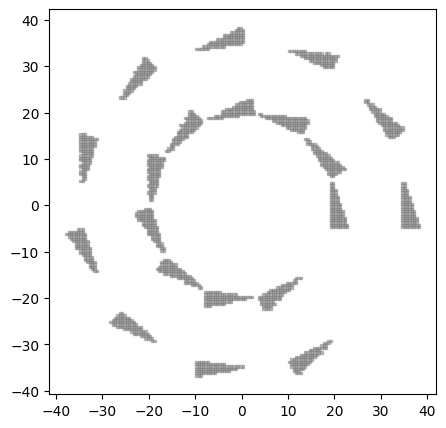

--------------------------------------------------
label: VentHole Chromosome_335: ['RayShape_3', 'CircularStrictTransformation_281']
predict: (0.28972432967918405, 372.71410369999995, 456.70999609999984)
biased_fitness: 0.6168688737914237, fitness: 0.7056362042081604
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


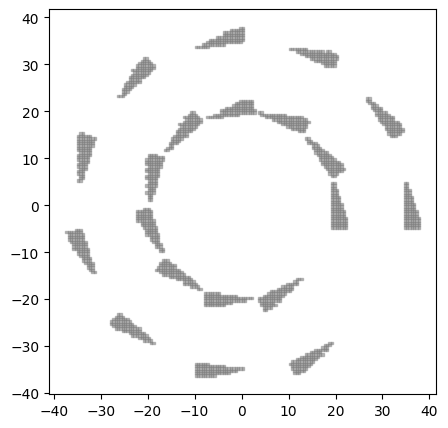

--------------------------------------------------
label: VentHole Chromosome_127: ['RayShape_156', 'CornerTransformation_127']
predict: (0.29062728153972417, 373.55605280000003, 461.0624373999997)
biased_fitness: 0.5913129196438619, fitness: 0.6706347336027596
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


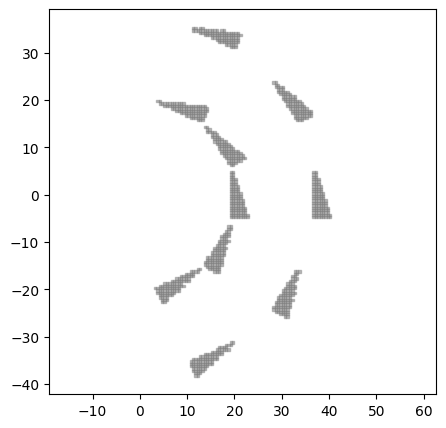

--------------------------------------------------
label: VentHole Chromosome_67: ['RayShape_127', 'CornerTransformation_405']
predict: (0.290690687731918, 373.6239966999999, 464.7773125999998)
biased_fitness: 0.5826557630531491, fitness: 0.6510865761808217
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


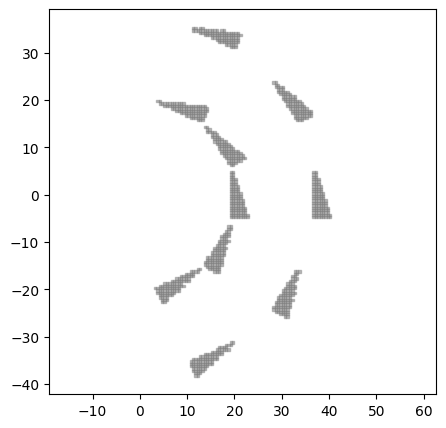

--------------------------------------------------
label: VentHole Chromosome_3: ['RayShape_3', 'CornerTransformation_127']
predict: (0.2902020247856205, 373.7941151, 458.81137809999984)
biased_fitness: 0.600578321301313, fitness: 0.6849522861437956
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


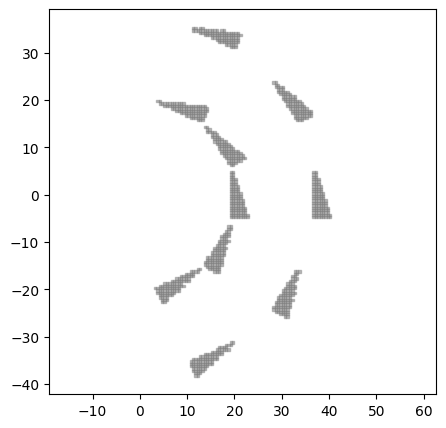

--------------------------------------------------
label: VentHole Chromosome_56: ['RayShape_281', 'GridStrictTransformation_127']
predict: (0.28923685481805084, 372.5442649999997, 457.5694397000001)
biased_fitness: 0.6228238281472894, fitness: 0.7070629283194926
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.0570638349267942, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 1.4319261182082728, dy: 9.306796670101225, ]


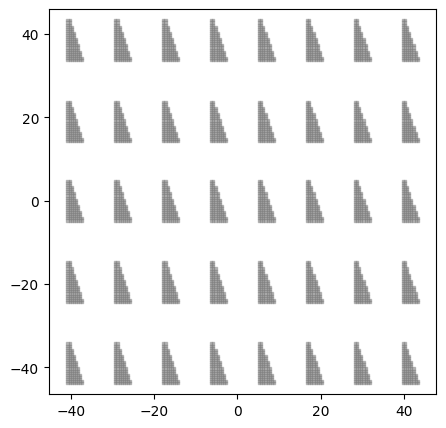

--------------------------------------------------
label: VentHole Chromosome_281: ['RayShape_67', 'GridStrictTransformation_156']
predict: (0.28943214959176, 372.7483686999999, 458.9891689)
biased_fitness: 0.6162297244153604, fitness: 0.6969908160824004
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ dx: 7.140913745046637, dy: 9.306796670101225, ]


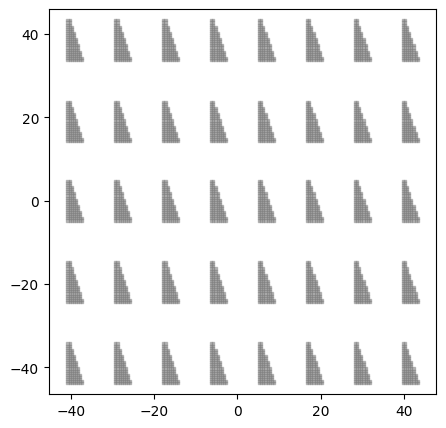

--------------------------------------------------
label: VentHole Chromosome_127: ['RayShape_281', 'CircularStrictTransformation_82']
predict: (0.2916440176989097, 373.6289306000001, 460.20488309999996)
biased_fitness: 0.5784293330152638, fitness: 0.6643907545109027
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.6359219869894064, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 5.2161084285555175, phi: 0.4487989505128276, ]


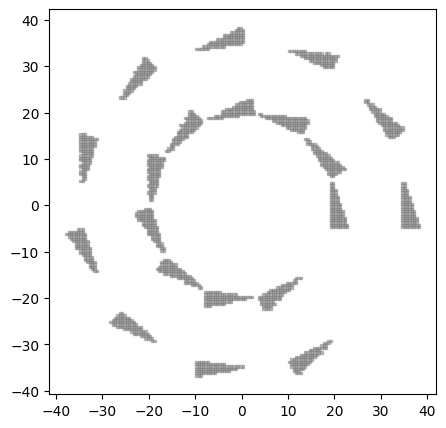

--------------------------------------------------
label: VentHole Chromosome_91: ['RayShape_281', 'CornerTransformation_281']
predict: (0.28955596002572603, 373.20929020000005, 457.91261549999973)
biased_fitness: 0.6143448776398356, fitness: 0.6988308712427406
shape parameter:
parameter_list: [ upper_slope: 2.935614211199354, nose_point: 1.3391357573687264, lower_coefficient: 3.0570638349267942, lower_x-intercept: 3.975773907047345, lower_y-intercept: 1.8363599993088502, ]
pattern parameter:
parameter_list: [ di: 14.973119396198104, dx: 7.116558959083419, phi: 0.2807215389683719, rot_count: 6.0, ]


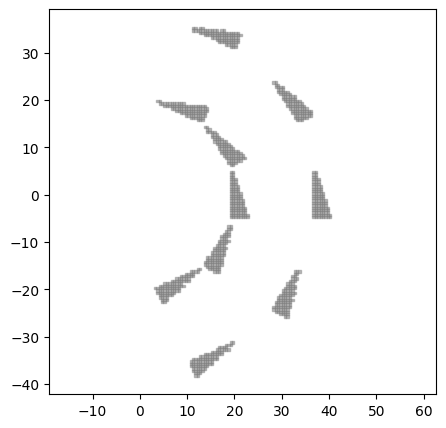

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )